📊 Monthly Revenue and Order Volume
   year month  total_revenue  order_volume
0  2024    01          550.0             2
1  2024    02          650.0             2
2  2024    03          950.0             3
3  2024    04          350.0             2
4  2024    05         1300.0             3

🏆 Top 3 Months by Sales
   year month  total_revenue
0  2024    05         1300.0
1  2024    03          950.0
2  2024    02          650.0


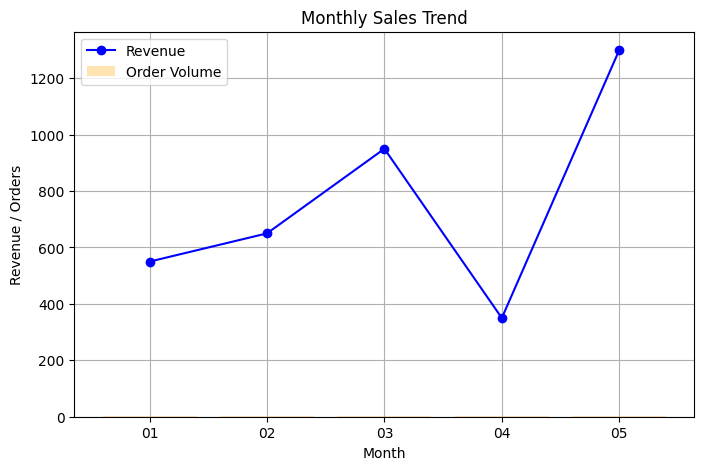

In [1]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create SQLite in-memory database
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Step 2: Create orders table
cursor.execute("""
CREATE TABLE orders (
    order_id INTEGER,
    order_date TEXT,
    amount REAL,
    product_id INTEGER
)
""")

# Step 3: Insert sample data (replace with your CSV later if needed)
data = [
    (1, "2024-01-15", 250.0, 101),
    (2, "2024-01-20", 300.0, 102),
    (3, "2024-02-05", 150.0, 103),
    (4, "2024-02-10", 500.0, 101),
    (5, "2024-03-12", 200.0, 104),
    (6, "2024-03-15", 450.0, 105),
    (7, "2024-03-25", 300.0, 101),
    (8, "2024-04-01", 100.0, 106),
    (9, "2024-04-18", 250.0, 102),
    (10, "2024-05-05", 600.0, 107),
    (11, "2024-05-12", 400.0, 108),
    (12, "2024-05-20", 300.0, 109),
]
cursor.executemany("INSERT INTO orders VALUES (?, ?, ?, ?)", data)
conn.commit()

# Step 4: SQL query - Monthly Revenue & Order Volume
query = """
SELECT
    strftime('%Y', order_date) AS year,
    strftime('%m', order_date) AS month,
    SUM(amount) AS total_revenue,
    COUNT(DISTINCT order_id) AS order_volume
FROM orders
GROUP BY year, month
ORDER BY year, month;
"""
df = pd.read_sql_query(query, conn)
print("📊 Monthly Revenue and Order Volume")
print(df)

# Step 5: SQL query - Top 3 Months by Sales
top3_query = """
SELECT
    strftime('%Y', order_date) AS year,
    strftime('%m', order_date) AS month,
    SUM(amount) AS total_revenue
FROM orders
GROUP BY year, month
ORDER BY total_revenue DESC
LIMIT 3;
"""
df_top3 = pd.read_sql_query(top3_query, conn)
print("\n🏆 Top 3 Months by Sales")
print(df_top3)

# Step 6: Visualization - Revenue Trend
plt.figure(figsize=(8,5))
plt.plot(df['month'], df['total_revenue'], marker='o', color="blue", label="Revenue")
plt.bar(df['month'], df['order_volume'], alpha=0.3, color="orange", label="Order Volume")
plt.xlabel("Month")
plt.ylabel("Revenue / Orders")
plt.title("Monthly Sales Trend")
plt.legend()
plt.grid(True)
plt.show()
